# Bisezione, Punto Fisso e Newton

In questo notebook troverai il codice per utilizzare questi tre algoritmi di calcolo delle radici di una funzione non lineare.

In [1]:
# importo alcune librerie utili
import numpy as np
import matplotlib.pyplot as plt

# per type safety, non obbligatorio :)
from typing import Callable, Tuple

## Bisezione

La bisezione si basa sullo scegliere un intervallo $[a, b]$, ricavarne il punto medio e capire in quale dei due intervalli trovati si abbia una radice, per poi ripetere fino ad avvicinarsi sempre di più allo zero, in modo da avere un'approssimazione sempre più accurata del risultato desiderato.  
Capire in quale intervallo si trovi la radice significa applicare Weierstrass sugli estremi dei due intervalli trovati, per poi decidere su quale operare.

Quindi, avendo un intervallo $[a, b]$ ed un numero massimo di passi $N$, significa fare:  
```
for i in range(N):
    c = (a + b) / 2
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
```

Nel caso si volesse invece implementare un criterio di arresto basato sulla stima dell'errore, con errore totale passato in input nella forma di $E_{tol}$ , (la tolleranza) occorrerebbe calcolare un $E_{max}= \frac{b - a}{2}$ ed accertarsi ad ogni iterazione che quest'ultimo non ecceda quello passato in input. Ovvero:
```
# per evitare errori di mancato assegnamento
Emax == (b - a)/2

while Emax > Etol:
    c = (a + b) / 2
    if f(a)*f(c) < 0:
        b = c
    else:
        a = c
    Emax = (b - a)/2
```
Al termine del codice, l'algoritmo dovrebbe ritornare la radice trovata e l'errore trovato.

### Esempio pratico

Ipotizziamo di voler calcolare una radice della funzione $f(x) = x^2 - 2$, all'interno dell'intervallo $[0, 2]$, imponendo una tolleranza $E_{tol} = 0,01$. Allora scriveremmo:

In [2]:
# definiamo una funzione per riutilizzare il codice di Bisezione
def bisezione(f : Callable[[float], float], a : float, b : float, tol : float) -> Tuple[float, float]:
    """
    parameters:
    - f: funzione che accetta in input un float e ne ritorna un altro
    - a: minimo dell'intervallo in cui si vuole lavorare
    - b: massimo dell'intervallo in cui si vuole lavorare
    - tol: la tolleranza dell'errore

    returns:
    una tupla contenente la radice della funzione trovata e l'errore massimo trovato
    """
    c = 0.
    emax = (b - a) / 2
    
    while emax > tol:
        c = (a + b) / 2
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
        emax = (b - a) / 2

    return (c, emax)

Ora, per testare la nostra funzione:

In [3]:
f = lambda x : x**2 - 2
a = 0; b = 2
etol = 0.01
bisezione(f, a, b, etol)

(1.421875, 0.0078125)

#### Giochiamo con i valori

E se modificassimo la tolleranza, passando da $0.01$ a $0.001$? E se invece di $[0, 2]$ prendessimo come intervallo $[2, 4]$? Cosa accadrebbe?

In [4]:
etol = 0.001
bisezione(f, a, b, etol)

(1.416015625, 0.0009765625)

In [5]:
a = 2; b = 4
bisezione(f, a, b, etol)

(3.998046875, 0.0009765625)

## Punto Fisso

Supponiamo di voler trovare lo zero della funzione $f = cos(x) - x$ e di volerlo fare usando, come funzione di iterazione, un'altra funzione $g(x) = cos(x)$, sapendo che $f$ sia una contrazione in $[-1, 1]$.
Anzitutto definiamo le due funzioni:
```
# definisco le due funzioni
f = lambda x : np.cos(x) - x
g = lambda x : np.cos(x)
```

In seguito definiamo l'intervallo in cui operare: per farlo, ricordiamo come il punto fisso si trovi all'interno dell'intervallo $[-1, 1]$. Questo significa che potremo decidere un qualunque sotto-insieme di questo intervallo per la nostra implementazione, ricordando che, qualora partissimo, ad esempio, da $0$ anziche da $-1$, nel caso in cui il punto fisso $x^*$ si trovasse più vicino al $-1$ rispetto che all'$1$, occorrerebbero più iterazioni. Questo non consiste tuttavia in un errore dato che, sapendo che $g$ sia una contrazione in $[-1, 1]$, significa che:
- preso un qualunque x generico di tale intervallo, anche $g(x)$ esisterà (g **mappa** l'intervallo scelto);
- esisterà una costante $L \lt 1$ tale che $|g'(x)| \leq L \ \forall x \in [-1, 1]$, ovvero una garanzia che la funzione converga al punto fisso $x^*$, dove $g(x^*) = x^*$;

Prendiamo quindi un sotto-insieme di $[-1, 1]$, come $[0, 1]$:
```
# preparo l'insieme di punti per il grafico
a = 0; b = 1
points = np.linspace(a, b)
```

Definiamo il nostro punto di partenza: partendo da destra, dovremo partire dal valore $b$ e decrescere ad ogni iterazione, altrimenti (partendo da sinistra) dovremo partire da $a$ ed aumentare ad ogni giro. Nel nostro esempio partiremo da sinistra, quindi:
```
x_k = a
```

Ricordiamoci di impostare un criterio di arresto basato sul numero di iterazioni:
```
# 10 iterazioni per un esempio vanno bene
max_iterations = 10
```

Ed iniziamo ad iterare, ottenendo ad ogni iterazione $k$ un nuovo valore $g(x_k)$. Questo valore diventerà il nostro nuovo $x_k$ per la prossima iterazione:
```
for k in range(max_iterations):
    g_x_k = g(x_k)
    x_k = g_x_k
    # scriviamo eventualmente i valori trovati
```
Quindi, a lavoro finito, avremo qualcosa del genere (con l'aggiunta del plotting della funzione per avere un output visivo):

x_1 = 1.0
x_2 = 0.5403023058681398
x_3 = 0.8575532158463933
x_4 = 0.6542897904977792
x_5 = 0.7934803587425655
x_6 = 0.7013687736227566
x_7 = 0.7639596829006542
x_8 = 0.7221024250267077
x_9 = 0.7504177617637605
x_10 = 0.7314040424225098


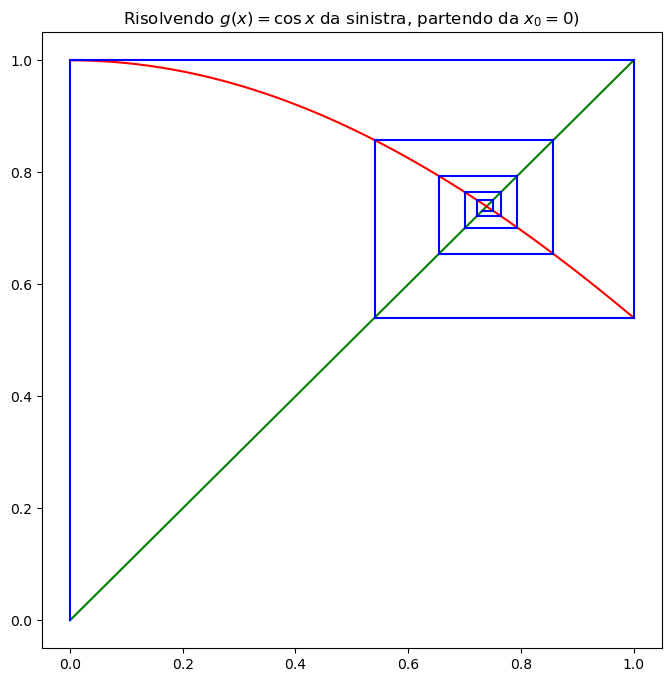

In [12]:
# f non ci serve, scrivo per chiarezza
f = lambda x : np.cos(x) - x
g = lambda x : np.cos(x)

# definisco l'intervallo ed ottengo i punti
a = 0; b = 1
points = np.linspace(a, b)

# condizione di arresto basata sulle iterazioni
max_iter = 10

# definisco le properties del grafico
plt.figure(figsize=(8, 8))
# posso usare latex nel titolo!
plt.title(f"Risolvendo $g(x) = \cos x$ da sinistra, partendo da $x_0 = {a}$)")

plt.plot(points, points, 'g')
plt.plot(points, g(points), 'r')

# valore iniziale di x_k
x_k = a
for k in range(max_iter):
    g_x_k = g(x_k)
    plt.plot([x_k, x_k], [x_k, g_x_k], 'b')
    plt.plot([x_k, g_x_k], [g_x_k, g_x_k], 'b')
    x_k = g_x_k
    print(f"x_{k + 1} = {x_k}")

## Newton

Newton si basa sullo scegliere un $x_0$ vicino alla soluzione cercata, per poi proseguire con la seguente strategia:
1. calcola la retta tangente ad $f$ nel punto $(x_0, f(x_0))$
2. trova dove questa tangente interseca l'asse $x$
3. questo punto diventa il nuovo $x_1$
4. ripeti

Questo algoritmo si basa sull'intuizione per cui la tangente sia una buona approssimazione locale della funzione $f$, rendendo così il suo zero vicino a quello vero. 

La formula iterativa su cui si basa è la seguente: $x_{k + 1} = x_k - \frac{f(x_k)}{f'(x_k)}$

In pseudocodice sarebbe qualcosa del genere:
```pseudocodice
Input: x_0 (punto iniziale), tol (tolleranza), max_iter

k = 0
while |f(x_k)| > tol AND k < max_iter:
    f_val = f(x_k)
    f_prime = f'(x_k)

    if |f_prime| < c // c << 0
        print("Derivata troppo piccola, algoritmo fallisce)
        break

    x_{k + 1} = x_k - f_val/f_prime

return x_k
```

Con i seguenti criteri di arresto:
- $|f(x_k)| < \epsilon$: sei vicino allo zero, risultato trovato
- $|x_{k + 1} - x_k| < \epsilon$: le iterate non cambiano più
- $k > max_iter$: troppi passi, probabilmente non converge